![](https://github.com/Ai-Adventures/rmd/blob/master/notebooks/images/logo_full.png?raw=1)

The course is offered by [Ai Adventures](https://aiadventures.in/). The notebooks are created by [Ankur Singh](https://twitter.com/I_ankursingh). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0 license](https://creativecommons.org/licenses/by-nc-sa/4.0/). Any use for commercial purpose is strictly prohibited.

<a href="https://colab.research.google.com/github/Ai-Adventures/rmd/blob/master/notebooks/02_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Binary classification problem : Dummy dataset

#### Getting data


In [0]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

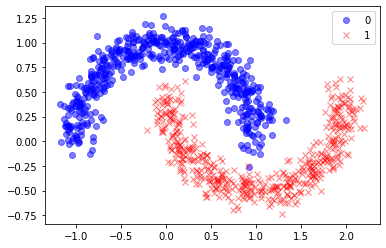

In [2]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.1, random_state=0)
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
plt.legend(['0', '1'])

In [3]:
X.shape

(1000, 2)

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Building Model

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.optimizers import Adam, RMSprop

In [8]:
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='tanh'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy']) 

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


You need to focus on two things:
- Last layer activation: **sigmoid**
- Loss function: **binary_crossentropy**

In [9]:
## training
model.fit(X_train, y_train, epochs=100, verbose=0, validation_data = (X_test, y_test))

#### Evaluating

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_train_pred = model.predict_classes(X_train)
y_test_pred = model.predict_classes(X_test)

print("The Accuracy score on the Train set is:\t{:0.3f}".format(accuracy_score(y_train, y_train_pred)))
print("The Accuracy score on the Test set is:\t{:0.3f}".format(accuracy_score(y_test, y_test_pred)))

The Accuracy score on the Train set is:	0.999
The Accuracy score on the Test set is:	1.000


In [0]:
def plot_decision_boundary(model, X, y):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    c = model.predict(ab)
    cc = c.reshape(aa.shape)

    plt.figure(figsize=(12, 8))
    plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
    plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
    plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
    plt.legend(['0', '1'])

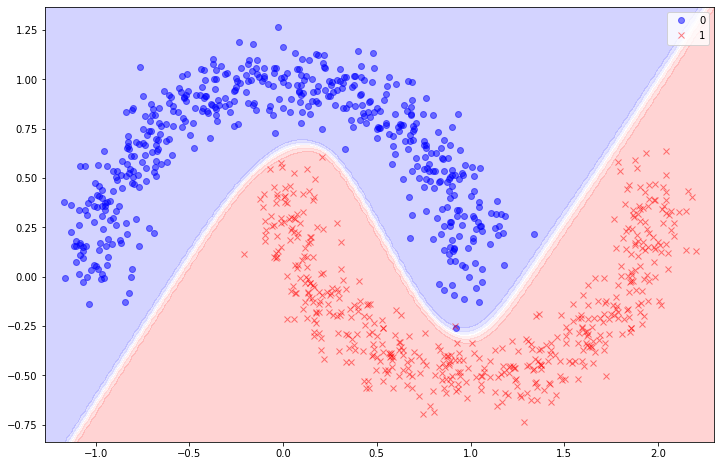

In [12]:
plot_decision_boundary(model, X, y)

## Multiclass classification Problem : MNIST dataset

#### Getting data

In [0]:
from tensorflow.keras.datasets import mnist

In [14]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [15]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

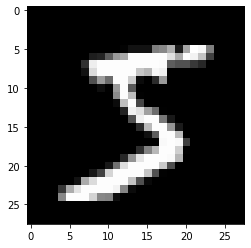

In [16]:
plt.imshow(X_train[0], cmap='gray')

In [0]:
## reshaping our data to work with FCL
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

In [18]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

In [20]:
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [0]:
y_train_cat = to_categorical(y_train) # one-hot encoding the labels
y_test_cat = to_categorical(y_test)

In [22]:
print(y_train[0])
print(y_train_cat[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [23]:
y_train_cat.shape, y_test_cat.shape

((60000, 10), (10000, 10))

##### Building model

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow.keras.backend as K

K.clear_session()

model = Sequential()
model.add(Dense(128, input_shape=(28*28,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

Again, focus on two things:
- Last layer activation: **softmax**
- Loss function: **categorical_crossentropy**

In [28]:
h = model.fit(X_train, y_train_cat, batch_size=128, epochs=10, verbose=1, validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 1s 28us/sample - loss: 0.0189 - acc: 0.9939 - val_loss: 0.0296 - val_acc: 0.9901
Epoch 2/10
42000/42000 [==============================] - 1s 27us/sample - loss: 0.0149 - acc: 0.9953 - val_loss: 0.0323 - val_acc: 0.9900
Epoch 3/10
42000/42000 [==============================] - 1s 28us/sample - loss: 0.0128 - acc: 0.9955 - val_loss: 0.0299 - val_acc: 0.9927
Epoch 4/10
42000/42000 [==============================] - 1s 28us/sample - loss: 0.0103 - acc: 0.9965 - val_loss: 0.0344 - val_acc: 0.9903
Epoch 5/10
42000/42000 [==============================] - 1s 29us/sample - loss: 0.0088 - acc: 0.9970 - val_loss: 0.0357 - val_acc: 0.9908
Epoch 6/10
42000/42000 [==============================] - 1s 28us/sample - loss: 0.0072 - acc: 0.9975 - val_loss: 0.0360 - val_acc: 0.9903
Epoch 7/10
42000/42000 [==============================] - 1s 28us/sample - loss: 0.0065 - acc: 0.9977 - val_loss: 0.

#### Evaluating

Text(0.5, 0, 'Epochs')

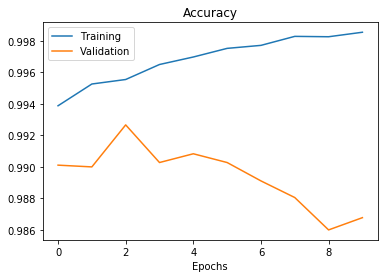

In [29]:
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
plt.xlabel('Epochs')

In [30]:
model.evaluate(X_test, y_test_cat)[1]

10000/10000 [==============================] - 0s 47us/sample - loss: 0.1447 - acc: 0.9768


0.9768

<BarContainer object of 10 artists>

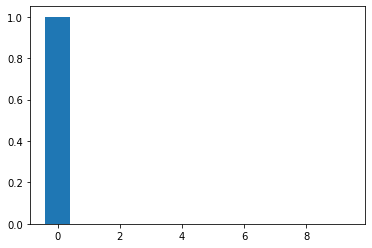

In [31]:
model.predict(X_test[10].reshape(1,-1))
plt.bar(range(10), model.predict(X_test[10].reshape(1,-1))[0])

In [32]:
y_test_cat[10]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [33]:
model.predict_proba(X_test[10].reshape(1,-1))

array([[1.0000000e+00, 3.7622382e-19, 5.6214377e-11, 8.7748411e-18,
        1.2650984e-14, 1.9628555e-15, 3.2486974e-13, 9.2850661e-14,
        4.1590876e-17, 3.7706546e-13]], dtype=float32)

## Summary

| Problem Type | Last layer activation | Loss Function |
|-|-|-|
| Regression to arbitrary values| - | Mean absolute error or Root mean square error |
| Regression to values between 0 and 1| Sigmoid | Mean absolute error or binary_crossentropy |
| Binary Classification | Sigmoid | binary_crossentropy |
| Multiclass, single-label Classification | Softmax | categorical_crossentropy |
